In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2 as cv
import numpy as np
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('median_hsv.csv')

df

,Type,Hue,Saturation,Value,Type.1,Hue.1,Saturation.1,Value.1,Type.2,Hue.2,...,Value.6,Type.7,Hue.7,Saturation.7,Value.7,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Medows,43.0,215.0,156.0,Forest,46.0,165.0,62.0,Fields,26.0,...,141.0,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Medows,44.0,212.0,156.0,Forest,42.0,155.0,59.0,Fields,NaN,...,120.0,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Medows,42.0,216.0,151.0,Forest,45.0,163.0,60.0,Fields,NaN,...,110.0,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Medows,41.0,209.0,154.0,Forest,46.0,165.0,58.0,Fields,NaN,...,NaN,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medows,40.0,224.0,147.0,Forest,43.0,171.0,59.0,Fields,NaN,...,NaN,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,Medows,NaN,NaN,NaN,Forest,NaN,NaN,NaN,Fields,NaN,...,NaN,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
desired_columns = ['Type', 'Hue', 'Saturation', 'Value']
df_2 = pd.DataFrame(columns=desired_columns)

notna = df[f'Hue'].notna()
selected_values = df.loc[notna, 'Type':f'Value'].values.tolist()
vals_to_append = pd.DataFrame(selected_values, columns=desired_columns)
df_2 = pd.concat([df_2, vals_to_append], ignore_index=True)

for col in df.columns:
    if col.startswith('Unnamed'):
        break
    splitted = col.split('.')
    
    if len(splitted) == 2:
        if splitted[0] == 'Type':
            notna = df[f'Hue.{splitted[1]}'].notna()
            selected_values = df.loc[notna, col:f'Value.{splitted[1]}'].values.tolist()
            vals_to_append = pd.DataFrame(selected_values, columns=desired_columns)
            df_2 = pd.concat([df_2, vals_to_append], ignore_index=True)

# for col in desired_columns[1:]:
#     df_2[col] = df_2[col].astype(float)

df_2 = df_2.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        647 non-null    object 
 1   Hue         647 non-null    float64
 2   Saturation  647 non-null    float64
 3   Value       647 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.3+ KB


/tmp/ipykernel_953031/2384764148.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2 = pd.concat([df_2, vals_to_append], ignore_index=True)


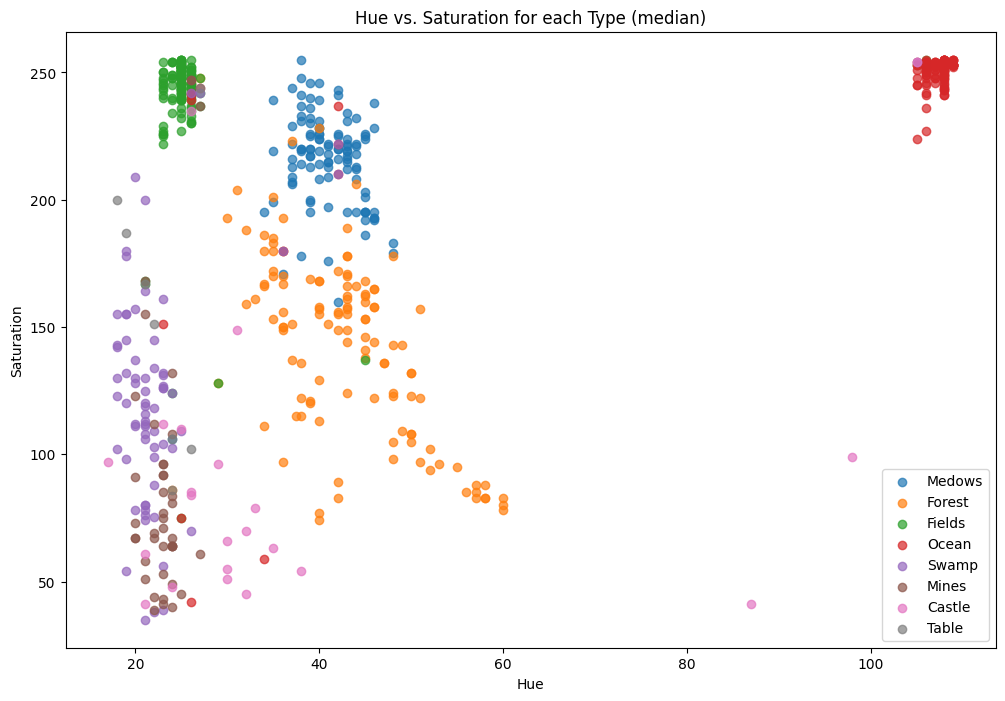

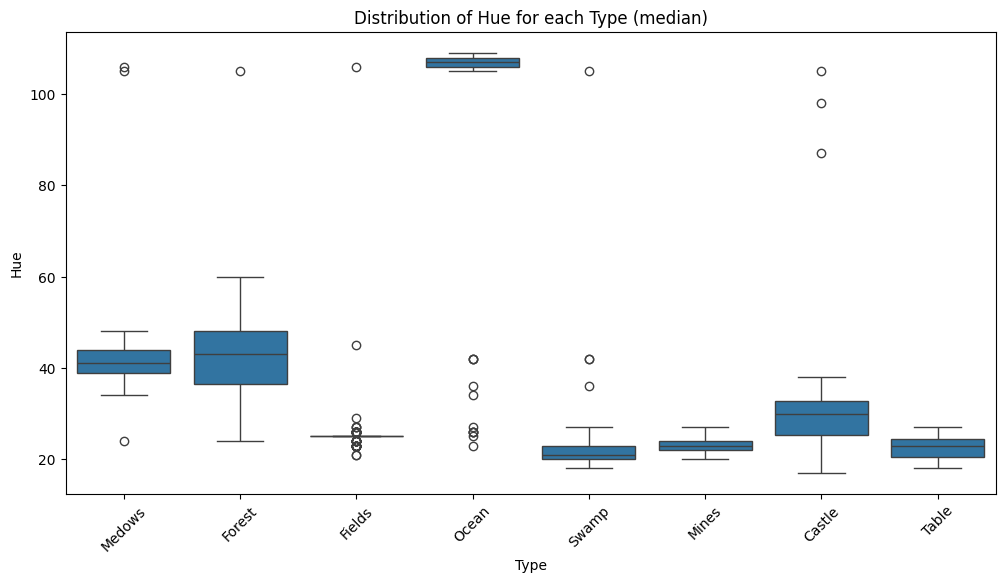

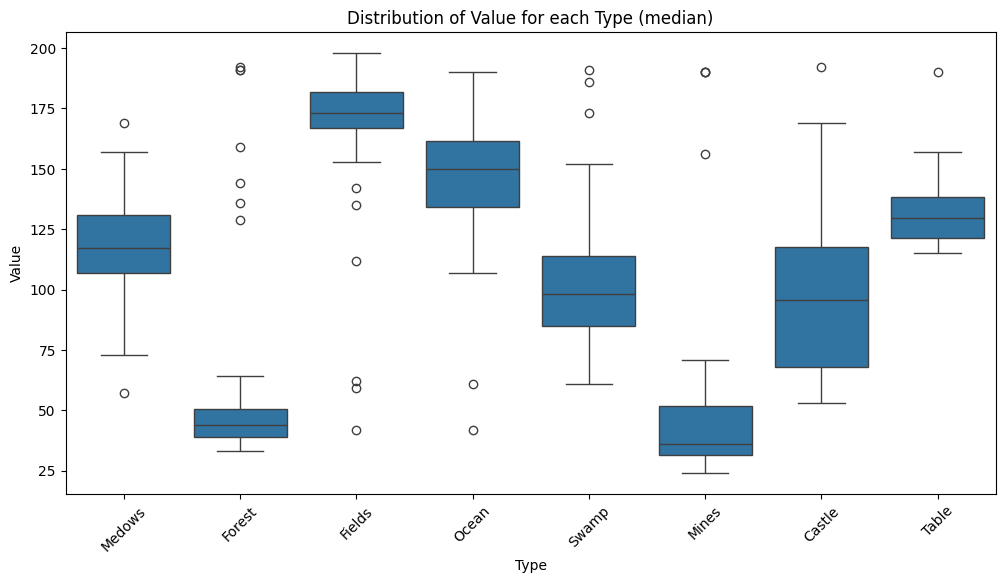

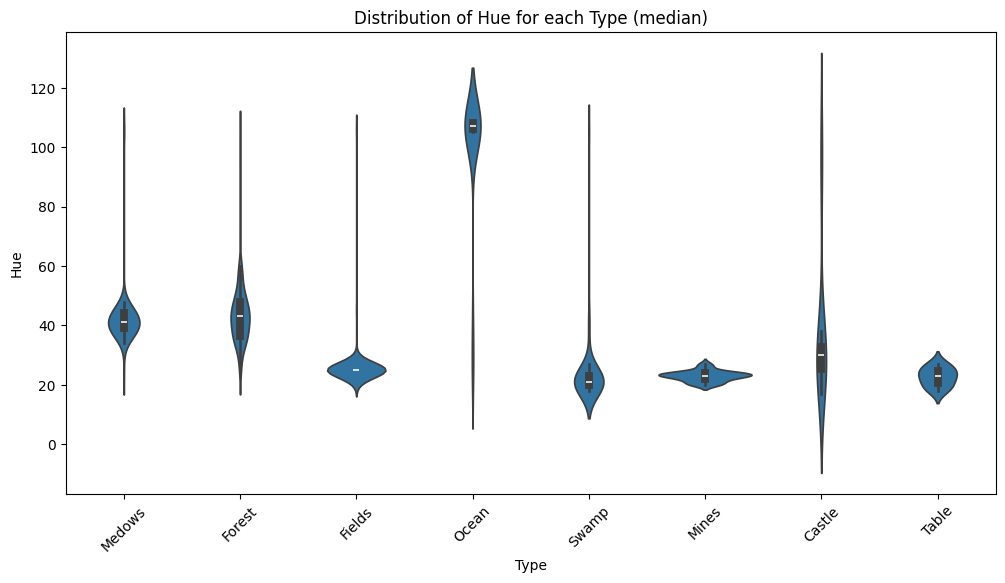

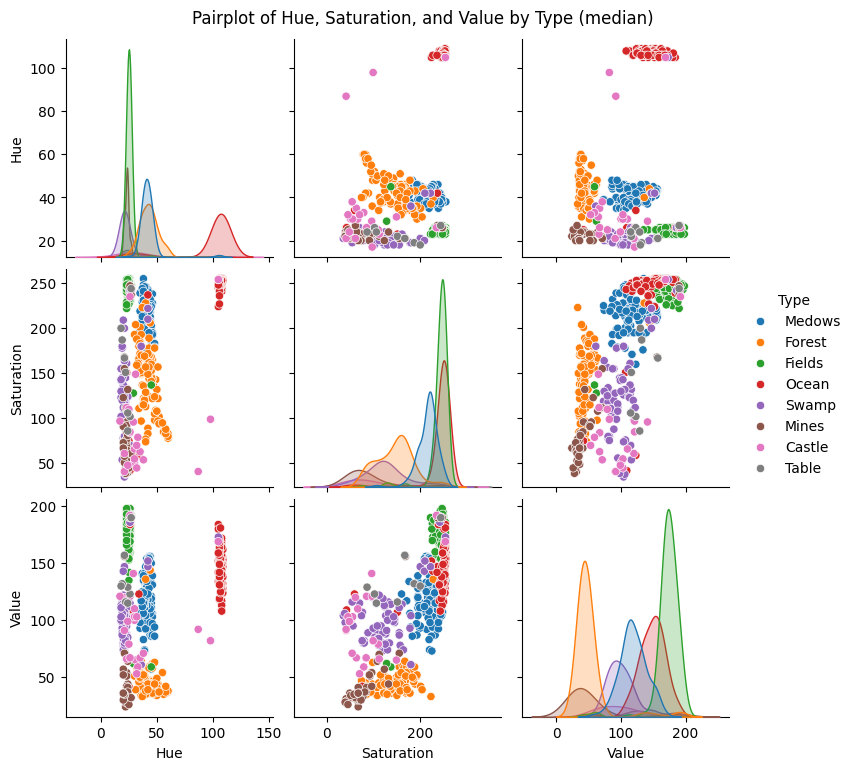

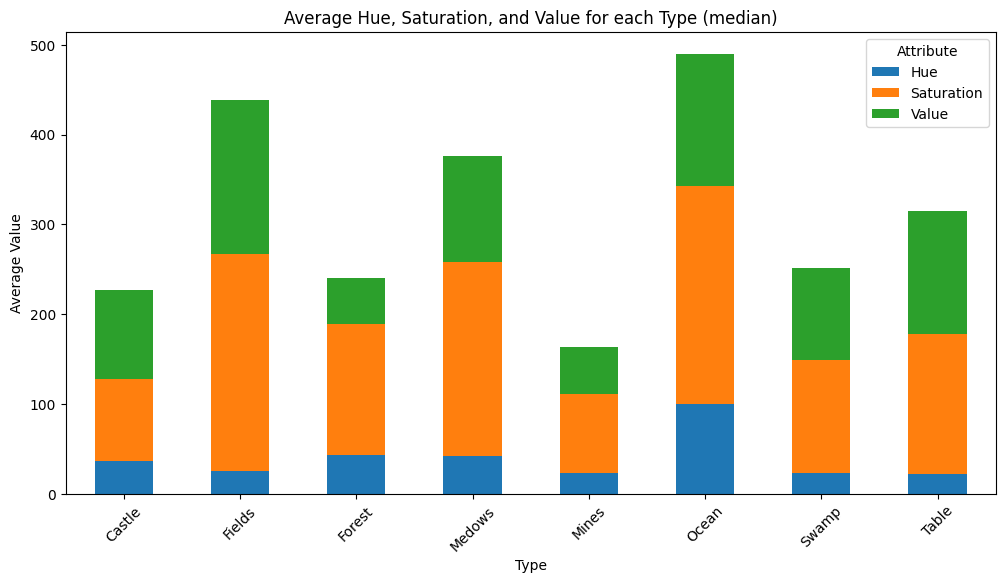

In [15]:
# 1. Scatter plot of Hue vs. Saturation for each Type
plt.figure(figsize=(12, 8))
for type in df_2['Type'].unique():
    subset = df_2[df_2['Type'] == type]
    plt.scatter(subset['Hue'], subset['Saturation'], label=type, alpha=0.7)
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue vs. Saturation for each Type (median)')
plt.legend()
plt.show()

# 2. Box plot of Hue for each Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Hue', data=df_2)
plt.title('Distribution of Hue for each Type (median)')
plt.xticks(rotation=45)
plt.show()

# 2. Box plot of Value for each Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Value', data=df_2)
plt.title('Distribution of Value for each Type (median)')
plt.xticks(rotation=45)
plt.show()

# 2. Box plot of Value for each Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Saturation', data=df_2)
plt.title('Distribution of Saturation for each Type (median)')
plt.xticks(rotation=45)
plt.show()

# 3. Violin plot of Hue for each Type
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type', y='Hue', data=df_2)
plt.title('Distribution of Hue for each Type (median)')
plt.xticks(rotation=45)
plt.show()

# 4. Pairplot for all numerical variables, colored by Type
sns.pairplot(df_2, hue='Type', vars=['Hue', 'Saturation', 'Value'])
plt.suptitle('Pairplot of Hue, Saturation, and Value by Type (median)', y=1.02)
plt.show()

# 5. Stacked bar chart of average Hue, Saturation, and Value for each Type
avg_data = df_2.groupby('Type')[['Hue', 'Saturation', 'Value']].mean()
avg_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Hue, Saturation, and Value for each Type (median)')
plt.xlabel('Type')
plt.ylabel('Average Value')
plt.legend(title='Attribute')
plt.xticks(rotation=45)
plt.show()

In [27]:
df_2.to_csv('median_hsv_nice.csv', index=False)

In [26]:
for tile_type in df['Type'].unique():
    print(tile_type)
    print(df[df['Type'] == tile_type].describe())

Medows
              Hue  Saturation       Value
count  109.000000  109.000000  109.000000
mean    42.055046  215.880734  118.655963
std      9.381656   21.119907   20.451014
min     24.000000  106.000000   57.000000
25%     39.000000  207.000000  107.000000
50%     41.000000  219.000000  117.000000
75%     44.000000  228.000000  131.000000
max    106.000000  255.000000  169.000000
Forest
              Hue  Saturation       Value
count  123.000000  123.000000  123.000000
mean    43.117886  145.520325   51.325203
std      9.530168   39.455588   29.136056
min     24.000000   74.000000   33.000000
25%     36.500000  117.500000   39.000000
50%     43.000000  151.000000   44.000000
75%     48.000000  168.000000   50.500000
max    105.000000  253.000000  192.000000
Fields
              Hue  Saturation       Value
count  155.000000  155.000000  155.000000
mean    25.574194  241.380645  171.735484
std      6.781323   23.739186   20.406606
min     21.000000   75.000000   42.000000
25%     25.00

In [18]:
df[df['Type'] == 'Ocean'].to_csv('ocean.csv')

In [5]:
df = df_2

In [6]:
X = df.drop('Type', axis=1)
y = df['Type'].astype('category')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
k = 20
knn = KNeighborsClassifier(k)

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [10]:
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
pd.DataFrame(report).transpose()

{'Castle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'Fields': {'precision': 0.8536585365853658, 'recall': 0.8974358974358975, 'f1-score': 0.875, 'support': 39.0}, 'Forest': {'precision': 0.8611111111111112, 'recall': 0.9393939393939394, 'f1-score': 0.8985507246376812, 'support': 33.0}, 'Medows': {'precision': 0.8214285714285714, 'recall': 0.9583333333333334, 'f1-score': 0.8846153846153846, 'support': 24.0}, 'Mines': {'precision': 0.8888888888888888, 'recall': 0.7272727272727273, 'f1-score': 0.8, 'support': 11.0}, 'Ocean': {'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1-score': 0.9166666666666666, 'support': 24.0}, 'Swamp': {'precision': 0.75, 'recall': 0.9, 'f1-score': 0.8181818181818182, 'support': 20.0}, 'Table': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'accuracy': 0.845679012345679, 'macro avg': {'precision': 0.6364692218350755, 'recall': 0.6673878205128205, 'f1-score': 0.6491268242626939, 'support': 162.0}, '

/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

,precision,recall,f1-score,support
Castle,0.000000,0.000000,0.000000,8.000000
Fields,0.853659,0.897436,0.875000,39.000000
Forest,0.861111,0.939394,0.898551,33.000000
Medows,0.821429,0.958333,0.884615,24.000000
Mines,0.888889,0.727273,0.800000,11.000000
Ocean,0.916667,0.916667,0.916667,24.000000
Swamp,0.750000,0.900000,0.818182,20.000000
Table,0.000000,0.000000,0.000000,3.000000
accuracy,0.845679,0.845679,0.845679,0.845679
macro avg,0.636469,0.667388,0.649127,162.000000


In [11]:
gbc = GradientBoostingClassifier()

In [12]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [13]:
y_pred = gbc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

,precision,recall,f1-score,support
Castle,0.750000,0.375000,0.500000,8.000000
Fields,0.871795,0.871795,0.871795,39.000000
Forest,0.911765,0.939394,0.925373,33.000000
Medows,0.880000,0.916667,0.897959,24.000000
Mines,0.727273,0.727273,0.727273,11.000000
Ocean,0.750000,0.875000,0.807692,24.000000
Swamp,0.809524,0.850000,0.829268,20.000000
Table,0.000000,0.000000,0.000000,3.000000
accuracy,0.839506,0.839506,0.839506,0.839506
macro avg,0.712545,0.694391,0.694920,162.000000


In [29]:
def get_tiles(image):
    tiles = []
    for y in range(5):
        tiles.append([])
        for x in range(5):
            tiles[-1].append(image[y * 100 : (y + 1) * 100, x * 100 : (x + 1) * 100])
    return tiles

In [30]:
def get_terrain(tile):
    hsv_tile = cv.cvtColor(tile, cv.COLOR_BGR2HSV)
    hue, saturation, value = np.median(
        hsv_tile, axis=(0, 1)
    )  # Consider using median instead of mean

    hue = hue.flatten()
    saturation = saturation.flatten()
    value = value.flatten()

    df_tile = pd.DataFrame({ 'Hue': hue, 'Saturation': saturation, 'Value': value })

    print(f"H: {hue}, S: {saturation}, V: {value}")
    return knn.predict(df_tile)

    # for tile_type in df['Type'].unique():
    #     described = df[df['Type'] == tile_type].describe(percentiles=[0.2, 0.5, 0.8]).to_dict()


    #     if described['Hue']['20%'] < hue < described['Hue']['80%'] and described['Saturation']['20%'] < saturation < described['Saturation']['80%'] and described['Value']['20%'] < value < described['Value']['80%']:
    #         return tile_type
        
    # return 'Unknown'

In [31]:
def dostuff():
    image_path = "./dataset/1.jpg"
    if not os.path.isfile(image_path):
        print("Image not found")
        return
    image = cv.imread(image_path)
    tiles = get_tiles(image)
    print(len(tiles))
    for y, row in enumerate(tiles):
        for x, tile in enumerate(row):
            print(f"Tile ({x}, {y}):")
            print(get_terrain(tile))
            print("=====")

In [33]:
dostuff()

5
Tile (0, 0):
H: [43.], S: [215.], V: [156.]
['Medows']
=====
Tile (1, 0):
H: [105.], S: [254.], V: [184.]
['Ocean']
=====
Tile (2, 0):
H: [46.], S: [165.], V: [62.]
['Forest']
=====
Tile (3, 0):
H: [42.], S: [155.], V: [59.]
['Forest']
=====
Tile (4, 0):
H: [45.], S: [163.], V: [60.]
['Forest']
=====
Tile (0, 1):
H: [44.], S: [212.], V: [156.]
['Medows']
=====
Tile (1, 1):
H: [46.], S: [165.], V: [58.]
['Forest']
=====
Tile (2, 1):
H: [43.], S: [171.], V: [59.]
['Forest']
=====
Tile (3, 1):
H: [36.], S: [167.], V: [64.]
['Forest']
=====
Tile (4, 1):
H: [42.], S: [216.], V: [151.]
['Medows']
=====
Tile (0, 2):
H: [41.], S: [209.], V: [154.]
['Medows']
=====
Tile (1, 2):
H: [23.], S: [127.], V: [114.]
['Swamp']
=====
Tile (2, 2):
H: [29.], S: [96.], V: [141.]
['Swamp']
=====
Tile (3, 2):
H: [43.], S: [178.], V: [58.]
['Forest']
=====
Tile (4, 2):
H: [40.], S: [224.], V: [147.]
['Medows']
=====
Tile (0, 3):
H: [43.], S: [224.], V: [151.]
['Medows']
=====
Tile (1, 3):
H: [23.], S: [132.]